In [ ]:
pip install factor_analyzer

In [30]:
df = pd.read_csv("/Users/spandanapatil/Desktop/FactorAnalysis/CC GENERAL.csv")

In [31]:
df.shape

(8950, 18)

In [32]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [33]:
df.drop([ 'CUST_ID'], axis=1, inplace=True)

In [34]:
df.dropna(inplace=True)

### Adequacy Test

In [35]:
kmo_all,kmo_model=calculate_kmo(df)

In [36]:
kmo_model

0.640893239542142

In [37]:
df.shape

(8636, 17)

In [38]:
fa = FactorAnalyzer()
fa.fit(df)
eigen_values, vectors = fa.get_eigenvalues()

In [39]:
eigen_values

array([4.62930009e+00, 3.46363229e+00, 1.51611673e+00, 1.28751346e+00,
       1.06702509e+00, 9.71173642e-01, 8.35751939e-01, 7.15824825e-01,
       6.25888438e-01, 5.23856343e-01, 4.01846616e-01, 3.01671735e-01,
       2.42540745e-01, 2.00372153e-01, 1.71376520e-01, 4.60976542e-02,
       1.17307815e-05])

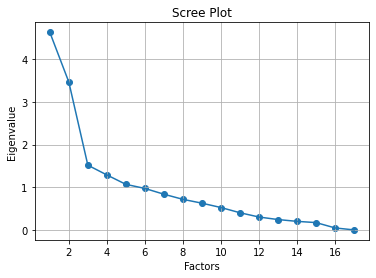

In [40]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),eigen_values)
plt.plot(range(1,df.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [41]:
fa = FactorAnalyzer()
fa.analyze(df, 6, rotation="varimax")
fa.loadings

AttributeError: 'FactorAnalyzer' object has no attribute 'analyze'

In [47]:
fa = FactorAnalyzer()
fa.set_params(n_factors = 8, rotation = "varimax")
fa.fit(df)
loadings = fa.loadings_

In [48]:
print(type(fa.loadings_))

<class 'numpy.ndarray'>


In [49]:
fa_df = pd.DataFrame({'Column1': fa.loadings_[:, 0], 'Column2': fa.loadings_[:, 1], 'Column3': fa.loadings_[:, 2], 'Column4': fa.loadings_[:, 3], 'Column5': fa.loadings_[:, 4], 'Column6': fa.loadings_[:, 5]})

In [50]:
fa_df.head()

,Column1,Column2,Column3,Column4,Column5,Column6
0,0.100259,0.307874,-0.049528,-0.018417,0.671457,0.668025
1,0.044944,0.116019,0.217280,0.169214,0.433166,-0.012080
2,0.876549,-0.063767,0.189453,0.153719,0.028192,0.138182
3,0.970126,-0.052446,0.066519,0.192769,0.017886,0.112147
4,0.298459,-0.054899,0.333487,0.007065,0.034743,0.121893


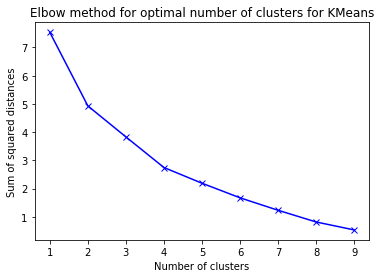

In [53]:
from sklearn.cluster import KMeans
distortions = []
K = range(1, 10)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(fa_df)
    distortions.append(kmeans.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal number of clusters for KMeans')
plt.show()